In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=5)

In [2]:
FILE = "LightmapsData/SHCoefficients_0"

In [3]:
with open(FILE + ".bin", "rb") as f:
  raw_data = f.read()

with open(FILE + ".json", "r") as f:
  meta_data = json.load(f)

meta_data

{'Width': 50,
 'Height': 5,
 'Depth': 5,
 'PixelFormat': 'R8G8B8A8',
 'BytesPerPixel': 4,
 'TotalBytes': 5000}

In [4]:
expected_size = meta_data["Width"] * meta_data["Height"] * meta_data["Depth"] * 4
expected_size

5000

In [5]:
arr = np.frombuffer(raw_data, dtype=np.uint8)
arr = arr.reshape((meta_data["Depth"], meta_data["Height"], meta_data["Width"], 4))
arr.shape

(5, 5, 50, 4)

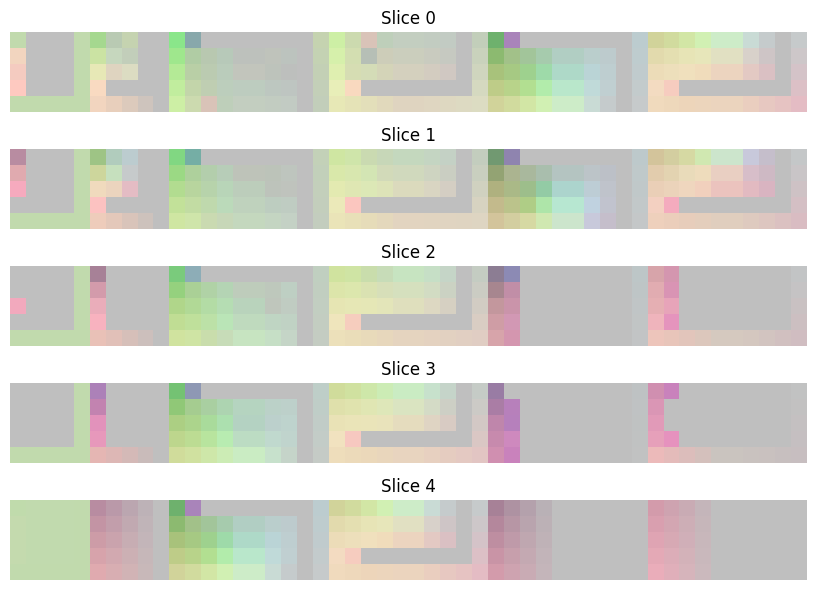

In [6]:
cols = 1
rows = meta_data["Depth"]
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
axes = axes.flatten()
for i in range(meta_data["Depth"]):
  axes[i].imshow(arr[i])
  axes[i].axis('off')
  axes[i].set_title(f'Slice {i}')

plt.tight_layout()
plt.show()

In [7]:
arr[0][-1][-1] / np.array([255, 255, 255, 255]) # show bottom right pixel value of first slice

array([0.82745, 0.56078, 0.61569, 0.59608])

In [8]:
from texture_sampler import load_texture, sample_uv

tex = load_texture("LightmapsData/SHCoefficients_0.bin", "LightmapsData/SHCoefficients_0.json")

In [9]:
sample_uv(tex, 0.01, 0.01, 0.00)

array([0.51373, 0.71373, 0.35294, 0.49412], dtype=float32)

In [10]:
# test ambient vector texture

In [11]:
# BrickTextureUVs __i06676.x, __i16677.x, __i26678.x float3 0.31288, 0.43666, 0.66076
# AmbientVector _8422.x, _8423.x, _8424.x float3 1.48535, 0.98926, 0.81299

In [12]:
ambient_tex = load_texture("LightmapsData/AmbientVector.bin", "LightmapsData/AmbientVector.json")

In [13]:
sample_uv(ambient_tex, 1.0, 1.0, 1.0)

array([0., 0., 0.], dtype=float32)

In [14]:
hardware_sample = np.array([1.48535, 0.98926, 0.81299])
software_sample = sample_uv(ambient_tex, 0.31288, 0.43666, 0.66076)
print("hardware:", hardware_sample)
print("software:", software_sample)

hardware: [1.48535 0.98926 0.81299]
software: [1.48514 0.98941 0.81304]


In [15]:
np.abs(hardware_sample - software_sample)

array([2.11226e-04, 1.50698e-04, 4.81107e-05])